# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание проекта**

Цель этого проекта, выявить от чего зависит цена недвижимости в Санкт-Петербурге и Ленинградской области.
Мы собираемся проверить, от каких факторов зависит стоимость квадратного метра и помочь бизнесу с выводами и принять верные решения.

### Откройте файл с данными и изучите общую информацию. 

#### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

#### Загружаем данные в датафрейм df

In [2]:
# файл использует в качестве разделителя - табуляцию, мы это указываем при заргузке чтобы корректно отобразить данные.
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### Изучаем информацию датафрейма

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**В датафрейме присутствуют пропуски 14 колонок и 22. Посмотрим на первые 5 строк датафрейма для ознакомления**

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Уже по первым колонкам мы видим что присутствуют как количественные так и качественные пропуски в колонках ниже** 

**Количественные:** 
ceiling_height, 
living_area, 
parks_nearest, 
ponds_nearest, 
days_exposition. 

**Качественные:** is_apartment

#### Строим общую гистограмму для всех столбцов таблицы

<function matplotlib.pyplot.show(close=None, block=None)>

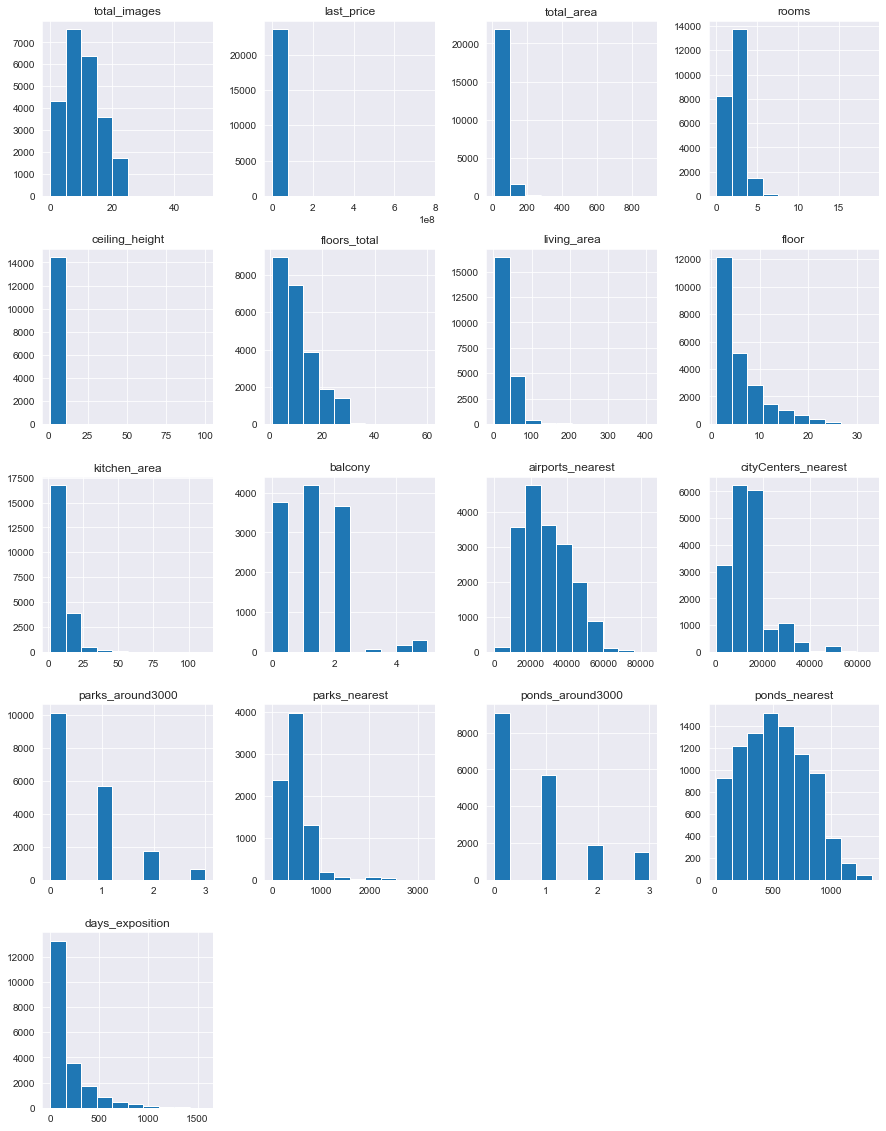

In [5]:
df.hist(figsize=(15, 20))
plt.show

#### Ищем потенциальные закономерности в данных

- **Информация предоставленная методом .describe() поможет нам выбрать нужный спсоб заполнения пропущенных значений.**

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


- **Стоит обратить внимание на стандартное отклонение (std), оно поможет нам в выборе методов .mean() или .median()**

### Предобработка данных

#### Ищем столбцы с пропусками

In [7]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


- В 14 из 22 колонок присутствуют пропуски. В подавляющем большинстве пропуски связаны с картографической информацией об объекте нежли с информацией предоставленной пользователем непосредственно о квартире.

#### Для выявления закономерностей в датафрейме которые нам помогут при заполнении пропусков выводим таблицу с корреляцией.

In [8]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


#### Заполняем пропущенные значения и удаляем ненужные строки

При выборе колонок для заполнения пропущенных значений я руководствовался фактом присутствия или наличия тех или иных значений. Например, пропущенные значения в колонке балконы, с большой долей вероятности говорит об отсутстрии балконов в квартире. Похожая картина с расстоянием до ближайших парков или прудов которые просто отсутствуют в радиусе 3 км.

In [9]:
# заполняем нулями пропуски тк скорее всего эти значения отсутствуют впринципе

df.fillna({
    'balcony': 0,
    'parks_around3000': 0,
    'ponds_around3000': 0,
}, inplace=True)

- Заполняем колонки 'days_exposition', 'parks_nearest', 'ponds_nearest', 'cityCenters_nearest', 'airports_nearest' медианными значениями (так как стандартное отклонение >>1) с привязкой к 'locality_name'
- Заполняем 'living_area', 'kitchen_area' медианными значениями (так как стандартное отклонение >>1) с привязкой к 'total_area'
- Значения высоты потолков не имеют сильного разброса (std = 1.261056) - используем среднее значение.
- Аппартаменты запоняем значением False, делаем допущение что это не аппартаменты раз информации у нас нет

In [10]:
# делаем цикл чтобы заполнить пропуски в колонках медианными значениями
for item in ['days_exposition', 'parks_nearest', 'ponds_nearest', 'cityCenters_nearest', 'airports_nearest']:
    df[item] = df[item].fillna(df.groupby('locality_name')[item].transform('median'))

for item in ['living_area', 'kitchen_area']:
    df[item] = df[item].fillna(df.groupby('total_area')[item].transform('median'))

# заполняем высоту потолоков средними значениями (std = 1.261056)
ceiling_height_mean = df['ceiling_height'].mean()
df['ceiling_height'] = df['ceiling_height'].fillna(value=ceiling_height_mean)

# заполняем пропущенные апартаменты значением False (сделаем допущение, что отсутстве значения это не аппартаменты)
df['is_apartment'] = df['is_apartment'].fillna('False')



Проводим проверку, и выводим обновлённый список пропусков в таблице. Пропуски остались. Это, вероятно, говроит о том что по сгруппированным референтным значениям не было возможно подсчитать медиану или средние значения из-за пропусков.

In [11]:
print(df.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area              143
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             205
balcony                    0
locality_name             49
airports_nearest        5394
cityCenters_nearest     5394
parks_around3000           0
parks_nearest           6032
ponds_around3000           0
ponds_nearest           5518
days_exposition           81
dtype: int64


Строки с пропущенными значениями в колонке `'locality_name'`, `'floors_total'` и `'days_exposition'` мы удалим тк они немногочисленные (менее 0,5% от общего количества наблюдений) и не могут повлиять на общую картину.

In [12]:
df = df.dropna(subset=['locality_name'])
df = df.dropna(subset=['floors_total'])
df = df.dropna(subset=['days_exposition'])

Проверяем наличие пропусков после заполнения. Как мы видим, пропуски в 3-x колонках были заменены на нулевые тк мы решили интерпритировать отсутствие значения как отсутствие данной опции впринципе. 

In [13]:
print(df.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area              133
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             185
balcony                    0
locality_name              0
airports_nearest        5298
cityCenters_nearest     5298
parks_around3000           0
parks_nearest           5906
ponds_around3000           0
ponds_nearest           5405
days_exposition            0
dtype: int64


#### Возможные причины пропусков в данных

Наличие пропусков в некоторых даных можно объяснить отсутствием того или иного элемента в описании недвижимости, пример: пропуски в столбце balcony означают их отсутствие.

Также, пропуски могут быть связаны с неполнотой информации или сбое при выгрузке данных. В некоторых случаях возможен человеческий фактор.

Пропуски в days_exposition, возможно, связаны с тем что объявление не было снято на момент выгрузки информации.

#### Нахождение и исправление типов данных

**Ниже я привожу список колонок нуждающихся в смене типа**

|Колонки               |Кол-во ненулевых значений |Было -> Стало      |Комментарий
|---                   |---                       |---                |---
|first_day_exposition  |23699 non-null            |object -> datetime |
|floors_total          |23613 non-null            |float64 -> int     |
|is_apartment          |2775 non-null             |object -> bool     |
|balcony               |12180 non-null            |float64 -> int     |
|airports_nearest      |18157 non-null            |float64 -> int     |(чрезмерная точность в долях метра излишняя)
|cityCenters_nearest   |18180 non-null            |float64 -> int     |(чрезмерная точность в долях метра излишняя)
|parks_around3000      |18181 non-null            |float64 -> int     |
|parks_nearest         |8079 non-null             |float64 -> int     |(чрезмерная точность в долях метра излишняя)
|ponds_around3000      |18181 non-null            |float64 -> int     |
|ponds_nearest         |9110 non-null             |float64 -> int     |(чрезмерная точность в долях метра излишняя)
|days_exposition       |20518 non-null            |float64 -> int     |

##### Чтобы сменить тип данных (float64 -> Int64) сразу для всех нужных колонок применяю цикл 

##### Округляем вещественные значения для поледующей конвертации в целые числа

In [14]:
# Создаём список колонок для конвертации в 'int64'

columns_to_int = ['floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
    'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

In [15]:
# Округляем вещественные числа для последующей конвертации в целые числа

for column in columns_to_int:
    df[column] = np.floor(df[column])

In [16]:
# Используем метод .astype() в цикле для изменения типов данных на 'int64'

for col in [
    'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
    'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'
]:
    
    
    df[col] = df[col].astype("Int64", errors='ignore')
    

##### Меняю тип (object -> bool) данных для колонки is_apartment

In [17]:
df['is_apartment'] = df['is_apartment'].astype('bool')

##### Здесь я меняю тип даты (object -> datetime) в колонке first_day_exposition

In [18]:
df['first_day_exposition'] = pd.to_datetime(
    
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
) 

##### Проверяем факт замены типов на новые


Оставил пропуски как есть тк их не чем запонять.

In [19]:
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          Int64
locality_name                   object
airports_nearest                 Int64
cityCenters_nearest              Int64
parks_around3000                 Int64
parks_nearest                    Int64
ponds_around3000                 Int64
ponds_nearest                    Int64
days_exposition                  Int64
dtype: object

#### Зачем менять тип данных

Замена типов данных необходима для корректного отображения величин которые характерны для определённых типов даных. Например, целесообразней указывть расстояние до центра города в метрах без дробной доли тк такая точность избыточна и не несёт никакой пользы.

Также, количественые показатели вроде количества недилимых данных, например, количество парков или водоёмов поблизости гораздо логичнее записывать целым числом, а не вещественным.

Цену на недвижимость, альтернативно, тоже можно перевести в целые числа тк цены на недвижимость обычно не дробятся на копейки. Но так как денежный формат предусматривает наличие дробных долей, считаю допустимым не менять их, но обознатить такую возможность, тем не менее, считаю нужным.


#### Находим и удаляем явные и неявные дубликаты

In [20]:
# Проверяем явные дубликаты. Их нет.
df.duplicated().sum()

0

In [21]:
# Считаем количество уникальных значений до удаления из - 330
len(df['locality_name'].unique())

330

Как видно из таблицы ниже, названия одних и тех не населённых пунктов дублируются. Расхождения возникают из-за разницы в написании. Заменим "ё" на "е", а ПГТ на поселок.

In [22]:
sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',

In [23]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')
df['locality_name'] = df['locality_name'].replace({r'(\b)поселок городского типа(\b)':r'\1поселок\2'}, regex=True)

In [24]:
len(df['locality_name'].unique())

298

Как видим - кол-во уникальных названий снизилось с 330 до 298.

#### Находим и устраняем выбивающиеся значения

Выведем все колонки и выберем из них те которые нужно приверить на выбивающиеся значения

In [25]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Выведем повторно статистические значения по колонкам чтобы выбрать данные для проверки

In [26]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23485.000000,2.348500e+04,23485.000000,23485.000000,23485.000000,23485.000000,23352.000000,23485.000000,23300.000000,23485.000000,18187.000000,18187.000000,23485.000000,17579.000000,23485.000000,18080.000000,23485.000000
mean,9.876474,6.553104e+06,60.358698,2.071109,2.771677,10.678007,34.484092,5.879668,10.456003,0.593443,28868.622478,14232.868587,0.470428,475.838387,0.591910,509.514657,170.173898
std,5.681943,1.092684e+07,35.700243,1.079083,0.990914,6.588150,21.875263,4.869022,5.786737,0.961049,12675.890975,8631.157107,0.749175,234.993455,0.884798,200.339402,207.185058
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.440000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18621.000000,9277.000000,0.000000,428.000000,0.000000,464.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.771499,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13099.000000,0.000000,460.000000,0.000000,503.000000,95.000000
75%,14.000000,6.800000e+06,69.800000,3.000000,2.771499,16.000000,42.300000,8.000000,11.800000,1.000000,37313.000000,16310.000000,1.000000,460.000000,1.000000,562.000000,201.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Создаю функцию чтоб проверить экстремальные и неправдоподобные значения потенциально подозрительных данных

In [27]:
def check_limits (column, sor=True):
    return df[column].sort_values(ascending=sor).head(20)

Применяем функцию `check_limits()` и проверяем колонки на выбросы. 
- Самой подозрительной колонкой является `'ceiling_height'` значения явно выходят за рамки характерных.

In [28]:

check_limits('ceiling_height', False)


22869    100.0
22336     32.0
3148      32.0
21377     27.5
10773     27.0
17857     27.0
21824     27.0
20478     27.0
5246      27.0
5807      27.0
4876      27.0
22938     27.0
5669      26.0
18545     25.0
6246      25.0
14382     25.0
4643      25.0
9379      25.0
355       25.0
11285     25.0
Name: ceiling_height, dtype: float64

In [29]:
check_limits('ceiling_height')

22590    1.00
5712     1.20
16934    1.75
20520    2.00
19329    2.00
552      2.00
16884    2.00
19098    2.00
5850     2.00
22960    2.00
2572     2.00
16446    2.00
4212     2.00
11352    2.00
12755    2.20
17794    2.25
1582     2.30
5498     2.30
17762    2.30
23498    2.30
Name: ceiling_height, dtype: float64

Создаю функцию для вывода графика. Очевидно наличие эктремальных значений

In [30]:
def graph(col):
    df.boxplot(column=col)
    plt.ylim(0,6)
    plt.show()

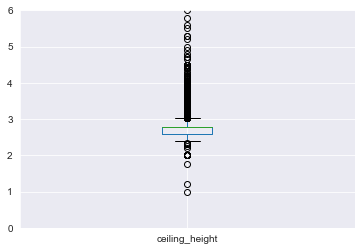

count    23485.000000
mean         2.771677
std          0.990914
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64

In [31]:
graph('ceiling_height')
df['ceiling_height'].describe()

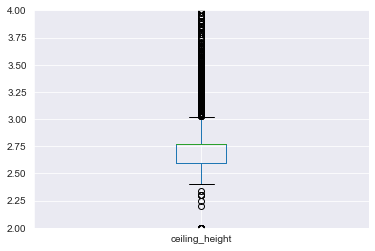

In [32]:
df.boxplot(column=['ceiling_height'])
plt.ylim(2,4)
plt.show()

Просматриваем высоту потолков > 3 метров.

In [33]:
df[df['ceiling_height'] > 3].sort_values('ceiling_height').tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,True,...,12.0,5,Санкт-Петербург,18732,20444,0,460,3,80,38
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10,30.1,3,False,...,8.1,2,поселок Мурино,<NA>,<NA>,0,<NA>,0,<NA>,71
21824,20,2450000.0,44.0,2019-02-12,2,27.0,2,38.0,2,False,...,8.6,2,городской поселок Большая Ижора,<NA>,<NA>,0,<NA>,0,<NA>,58
22938,14,4000000.0,98.0,2018-03-15,4,27.0,2,73.0,2,True,...,9.0,1,деревня Нижняя,<NA>,<NA>,0,<NA>,0,<NA>,27
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,True,...,9.0,2,деревня Мины,<NA>,<NA>,0,<NA>,0,<NA>,540
17857,1,3900000.0,56.0,2017-12-22,3,27.0,5,33.0,4,False,...,8.5,0,Санкт-Петербург,41030,15543,0,460,0,503,73
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24,37.7,19,False,...,11.0,2,Санкт-Петербург,42742,9760,0,460,0,503,61
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6,55.5,5,False,...,16.5,4,Санкт-Петербург,18838,3506,0,460,3,511,95
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,True,...,8.0,0,Волхов,<NA>,<NA>,0,<NA>,0,<NA>,104
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,11.0,5,Санкт-Петербург,34963,8283,1,223,3,30,19


Меняем выбивающиеся, неправдоподобные значения на новые и делаем срез оставшихся экстремальныъ значений

In [34]:
too_high = [32.0, 27.5, 27.0, 26.0, 25.0, 24.0, 22.6]
norm = [3.2, 2.75, 2.7, 2.6, 2.5, 2.4, 2.26]
df['ceiling_height'] = df['ceiling_height'].replace(too_high, norm)

In [35]:
# удаляем выбросы

df = df.loc[(df['ceiling_height'] >= 2) & (df['ceiling_height'] < 9)]
df = df.reset_index(drop=True)

Проверяем диаграмму размаха после удаления выбирающихся значений. Экстремальные значения удалены

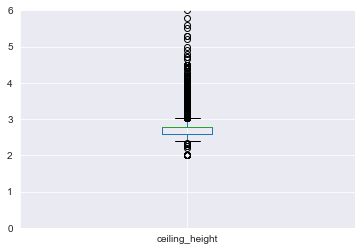

In [36]:
graph('ceiling_height')

Как мы видим, выстота потолков с двухзначными значениями были удалены. Оставшиеся значения до 8-ми метров вполне могут быть реальными значениями.

### Считаем и добавдяем в таблицу новые столбцы

In [37]:
df['sqare_m_price'] = df['last_price'] / df['total_area'] # Находим цену одного  м<sup>2</sup>
df['exposition_wk'] = df['first_day_exposition'].dt.weekday # Находим день недели публикации объявления
df['exposition_month'] = df['first_day_exposition'].dt.month # Находим месяц публикации объявления
df['exposition_year'] = df['first_day_exposition'].dt.year # Находим год публикации объявления

Проверяем наличие новых колонок в датафрейме

In [38]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'sqare_m_price', 'exposition_wk',
       'exposition_month', 'exposition_year'],
      dtype='object')

#### Разбиваем квартиры на категории

In [39]:
def floor_is(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'


df['floor_cat'] = df.apply(floor_is, axis=1)
     

In [40]:
# проверяем факт создания колонки
df['floor_cat'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_cat, dtype: object

#### Находим расстояние до центра города в километрах

In [41]:
# делим метры на 1000 и округляем
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] // 1000


In [42]:
# выводим 5 строк для проверки
df['cityCenters_nearest_km'].head()

0    16
1    18
2    13
3     6
4     8
Name: cityCenters_nearest_km, dtype: Int64

### Проведите исследовательский анализ данных

- Создаём функцию для отображения графиков и гистограмм

In [43]:
# функии передаётся колонка и размер диаграммы размаха для оптимального отображения 

def diagram(target_column, x=5, y=8, b=50):
    display(df[target_column].describe())
    df.boxplot(column = target_column, figsize = (x,y))
    plt.show()
    df.plot(y = target_column, kind = 'hist', bins = b, grid = True)
    plt.xlabel(target_column)
    plt.ylabel('Колчество наблюдений')

##### Общая площадь

count    23478.000000
mean        60.361484
std         35.703589
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

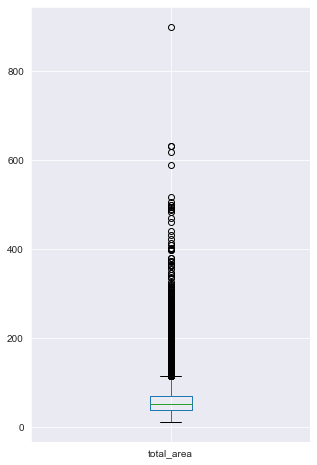

Text(0, 0.5, 'Колчество наблюдений')

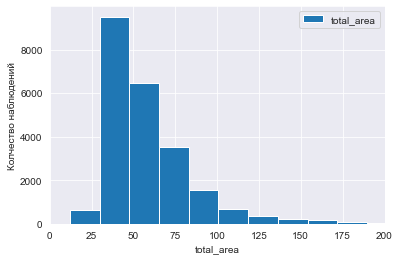

In [44]:
# Используем код из функции с дополнительными настройками чтобы не менять самц функцию

display(df['total_area'].describe())
df.boxplot(column = 'total_area', figsize = (5,8))
plt.show()
df.plot(y = 'total_area', kind = 'hist', bins = 50, grid = True)
plt.xlim(0,200)
plt.xlabel('total_area')
plt.ylabel('Колчество наблюдений')

count    23478.000000
mean        60.361484
std         35.703589
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

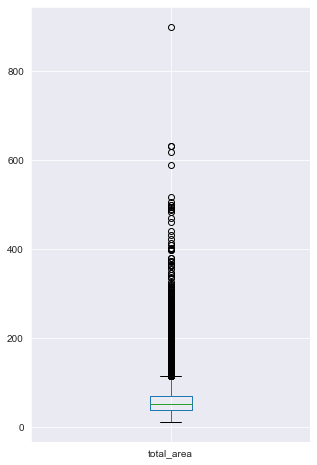

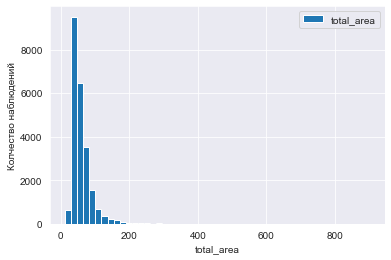

In [45]:
diagram('total_area')

- Наблюдения

Распределение нормальное, общая площадь имеет большой индекс стандартного рассеивания, часть помещений значильно больше средних значений.
При медианном значении 52 м<sup>2</sup> мы имеем максимум 900 м<sup>2</sup> что скорее всего является складским помещением или элитным жильём.

##### Жилая площадь

count    23345.000000
mean        34.486190
std         21.877094
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

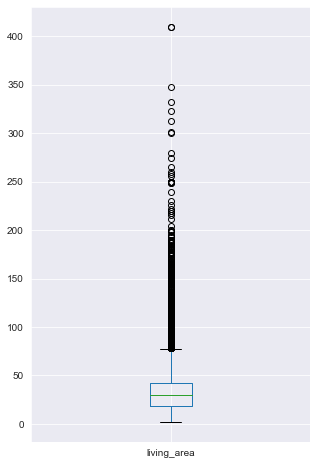

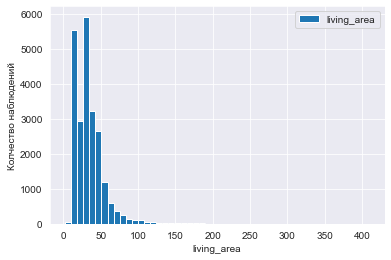

In [46]:
diagram('living_area')

- Наблюдения

Распределение нормальное, жилая площадь имеет большой индекс стандартного рассеивания, часть помещений значильно больше средних значений.
При медианном значении 30 м<sup>2</sup> мы имеем максимум 409 м<sup>2</sup> что скорее всего является элитным жильём.

##### Площадь кухни

count    23293.000000
mean        10.456456
std          5.787426
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        112.000000
Name: kitchen_area, dtype: float64

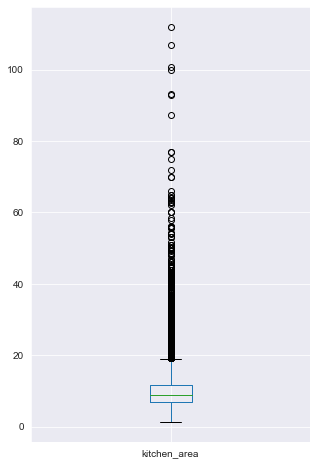

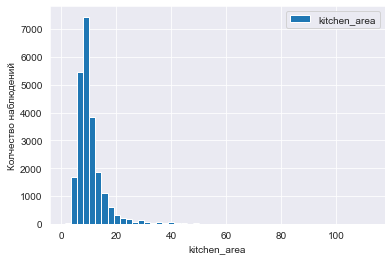

In [47]:
diagram('kitchen_area')

- Наблюдения

Распределение нормальное, площадь кухни имеет большой индекс стандартного рассеивания, часть помещений значильно больше средних значений.
При медианном значении 9 м<sup>2</sup> мы имеем максимум 112 м<sup>2</sup>.

##### Цена объекта

**Пояснение к графику:** 
- Цифра 1 на оси `y` в диаграмме размаха и оси `х` в гистограмме соответствуют 100 000 000 (1 = 100 000 000).
- В таблице указаны экспонентные значения.

count    2.347800e+04
mean     6.553175e+06
std      1.092826e+07
min      1.219000e+04
25%      3.439400e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

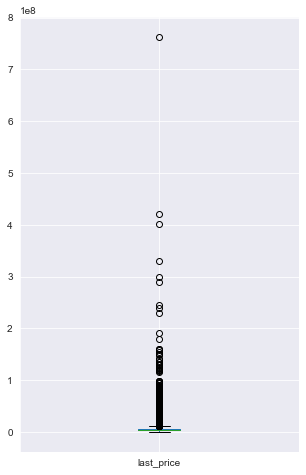

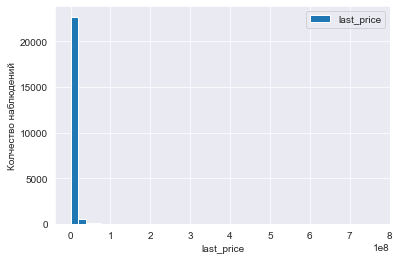

In [48]:
diagram('last_price', b=40)

На гистограмме выше может показаться что значения больше 50 000 000  отсутствуют, поэтому я вывожу дополнительный график ниже, чтобы показать что значения больше 50 000 000 присутствуют в небольших количествах.

<function matplotlib.pyplot.show(close=None, block=None)>

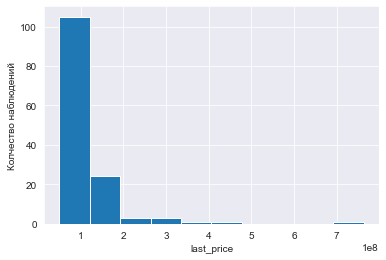

In [49]:
# дополнительная гистограмма цены от 50 000 000 до 763 000 000.

df['last_price'].hist(range=(50000000, 763000000))
plt.xlabel('last_price')
plt.ylabel('Колчество наблюдений')
plt.show

В ценовом диапазоне 0 - 10 000 000  строим дополнительный график чтобы увидеть распределение самых частых значений.

<function matplotlib.pyplot.show(close=None, block=None)>

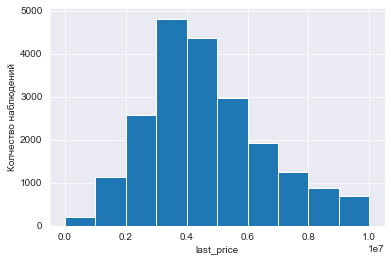

In [50]:
df['last_price'].hist(range=(0, 10000000))
plt.xlabel('last_price')
plt.ylabel('Колчество наблюдений')
plt.show

- Наблюдения

Как видно и графиков выше, ценовой диапазон довольно шикокий, при этом больше всего объявлений в ценовом промежутке от 3 000 000 до 5 000 0000. График показывает нормальное распределение (распределение Гаусса).

##### Количество комнат

count    23478.000000
mean         2.071216
std          1.079159
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

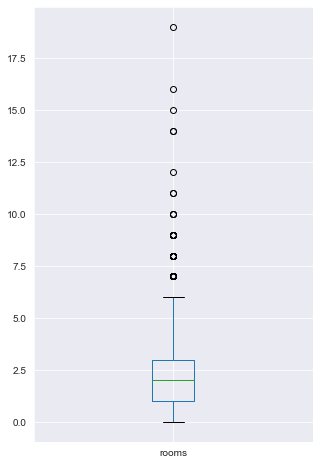

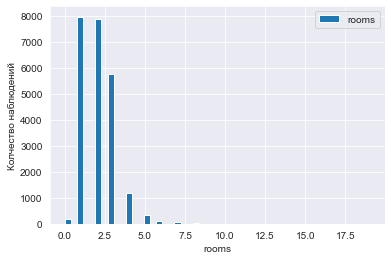

In [51]:
diagram('rooms')

- Наблюдения

Несмторя на отрывочные значения, большинство квартир имеют 2 комнаты. Распределение значений нормальное.

##### Высота потолков

count    23478.000000
mean         2.744910
std          0.230370
min          2.000000
25%          2.600000
50%          2.771499
75%          2.771499
max          8.300000
Name: ceiling_height, dtype: float64

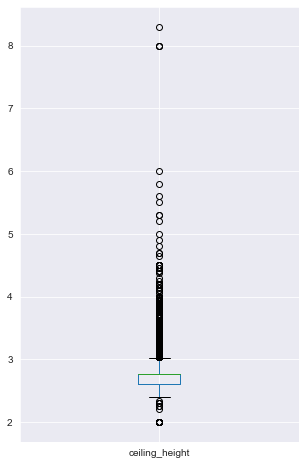

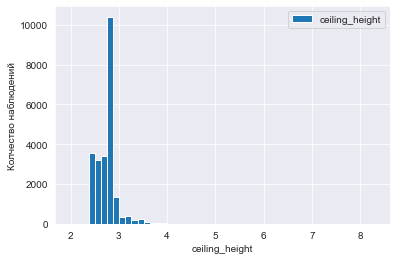

In [52]:
diagram('ceiling_height')

- Наблюдения

В подавляющем числе наблюдений высто потолков колеблется у отметки 2,77 м. Стандартное отклонение невелико несмотря на некоторое количество больших величин.

##### Этаж квартиры

count    23478.000000
mean         5.879206
std          4.868976
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

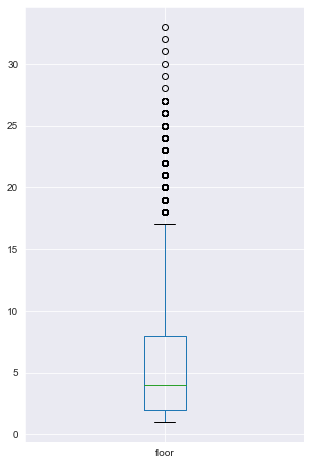

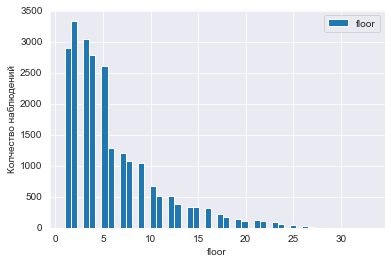

In [53]:
diagram('floor')

- Наблюдения

Чаще всего в выборке встречаются кварирына 4-м этаже. Значения имеют нормальное распределение от 1 до 33 этажей.

##### Тип этажа квартиры («первый», «последний», «другой»)

Тип этажа квартиры является качественным показателем. Чтобы построить график, посчитаем частоту каждого типа этажей методом .count()


In [54]:
#  Используем сводную таблицу

data_pivot = df.pivot_table(index=['floor_cat'],  aggfunc=['count'])
data_pivot['floor_cat_count'] = df.groupby('floor_cat')['floor_cat'].count()



Text(0, 0.5, 'Колчество наблюдений')

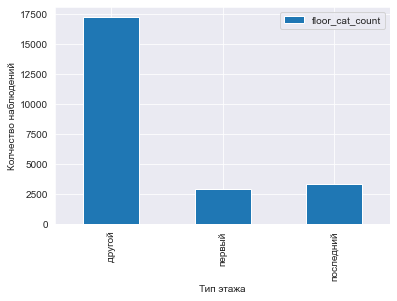

In [55]:
data_pivot.plot(y = 'floor_cat_count', kind = 'bar', grid = True)
plt.xlabel('Тип этажа')
plt.ylabel('Колчество наблюдений')

- Наблюдения

 Подавляющее большинство предложений приходиться на промежуточные этажи (не первый и не последний). Последние этажи слегка лидируют по отношению к первым.

##### Общее количество этажей в доме

count    23478.000000
mean        10.676804
std          6.586283
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

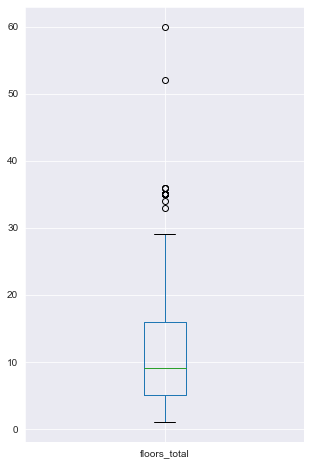

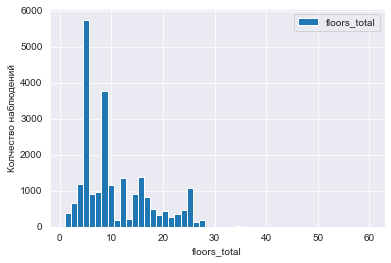

In [56]:
diagram('floors_total')

- Наблюдения

Медианное значение это 9-ти этажка. С местными пиками на отметке 5 и 9 этажей.

##### Расстояние до центра города в метрах

count    18181.000000
mean     14232.968429
std       8632.325181
min        181.000000
25%       9277.000000
50%      13098.000000
75%      16312.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

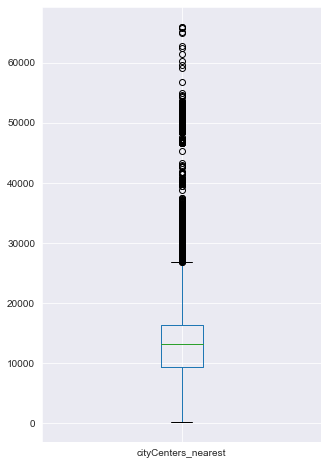

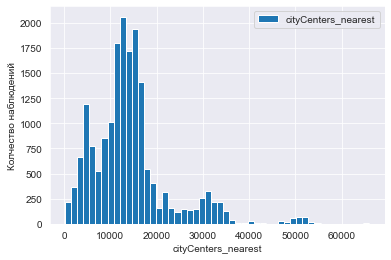

In [57]:
diagram('cityCenters_nearest')

- Наблюдения

13 000 м - медианное расстояние жилья от центра города. Исходя из гистограммы, основной массив жилья находится в диапазоне 10 000 - 20 000 метров от центра грода с последующим резким спадом.

##### Расстояние до ближайшего аэропорта

count    18181.000000
mean     28869.667620
std      12676.747981
min          0.000000
25%      18621.000000
50%      26757.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

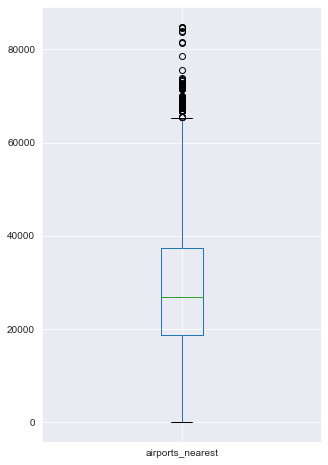

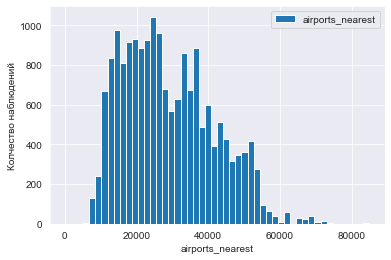

In [58]:
diagram('airports_nearest')

- Наблюдения

Основной массив квартир находится в диапазоне 10 000 - 55 000 метров от ближайшего аэропорта с медианным значением 26 757 м

##### Расстояние до ближайшего парка

count    17573.000000
mean       475.839071
std        234.992359
min          1.000000
25%        428.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

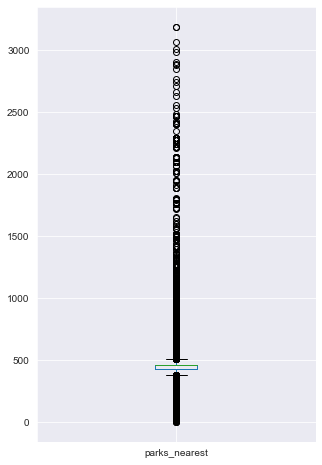

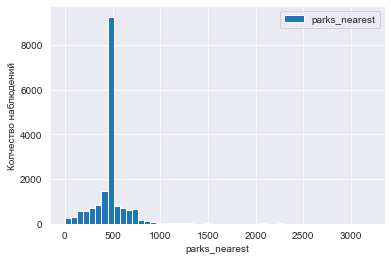

In [59]:
diagram('parks_nearest')

- Наблюдения

Обращает на себя внимание заметный, резкий пик значений в районе 460 м. С боковыми значениями в диапазоне 0 - 460 м и 460 - 750 м где наблюдается значительное снижение количества наблюдений. 

Большинство парков находятся в ~ 500 метрах от дома.

##### День недели публикации объявления

count    23478.000000
mean         2.567808
std          1.788749
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_wk, dtype: float64

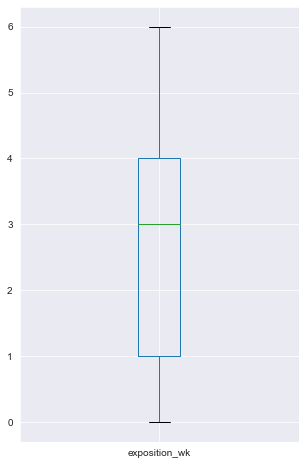

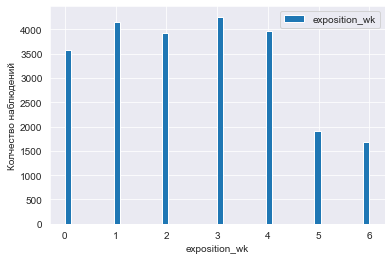

In [60]:
diagram('exposition_wk')

- Наблюдения

Мы наблюдаем равномерное распределение объявлений по дням недели за исключением выходных дней (сб, вс) где мы наблюдаем значительный спад размещённых объявлений. 

Обычно размещают 3 объявления в день.

##### Месяц публикации объявления

count    23478.000000
mean         6.404166
std          3.493182
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

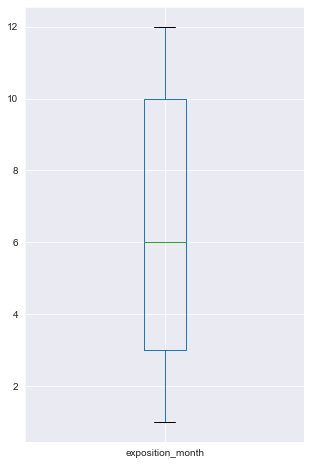

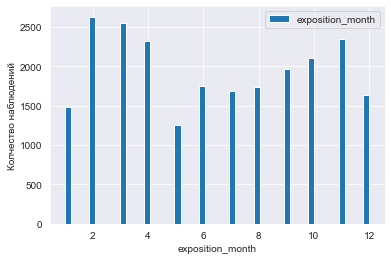

In [61]:
diagram('exposition_month')

- Наблюдения

Пик объявлений приходится на февраль-март-апрель с резким спадом мае и постепенным ростом с июня по ноябрь после которого следует резкий декабрьский спад.

##### Изучаем как быстро продавались квартиры

count    23478.000000
mean       170.186430
std        207.206565
min          1.000000
25%         45.000000
50%         95.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64

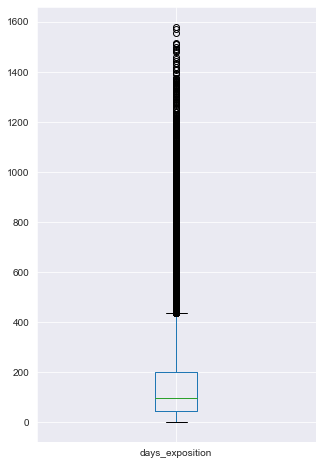

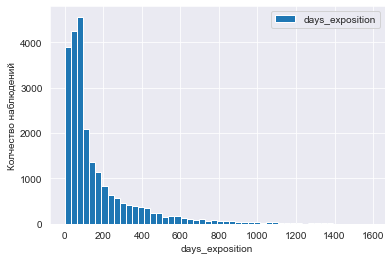

In [62]:
diagram('days_exposition')

count    23478.000000
mean       170.186430
std        207.206565
min          1.000000
25%         45.000000
50%         95.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64

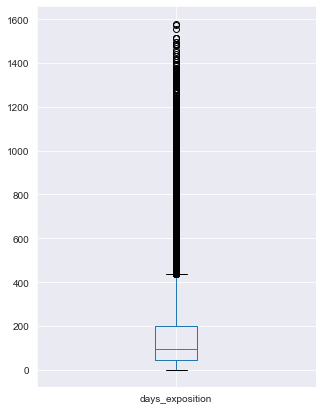

(0.0, 200.0)

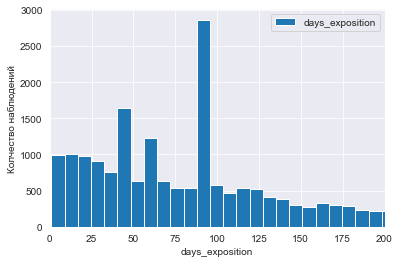

In [63]:
# использую код из функции с изменёнными параметрами для более детальной настройки графика

display(df['days_exposition'].describe())
df.boxplot(column = 'days_exposition', figsize = (5,7))
plt.show()
df.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid = True)
plt.xlabel('days_exposition')
plt.ylabel('Колчество наблюдений')
plt.xlim([0, 200])

**Вывод**

- Медианное значение - 95 дней, именно за такой срок половина продавцов своершают сделку по продаже недвижимости в Санкт Петербурге и Ленинградской области.

- Сравнительно быстрые продажи занимают 45 дней (25% минимальных значений), некоторые квартиры продаются за 1 день.
- Необычно долгими можно считать квартиры которые были проданы по истечении болле чем 400 дней.
- Наблюдаются интересные аномалии в виде всплесков количества квартир с временем экспозиции объявления в районе 40, 60 и 80 дней.

#### Исследуем какие факторы больше всего влияют на общую (полную) стоимость объекта

##### Исследуем зависимость цены от общей площади жилья

<function matplotlib.pyplot.show(close=None, block=None)>

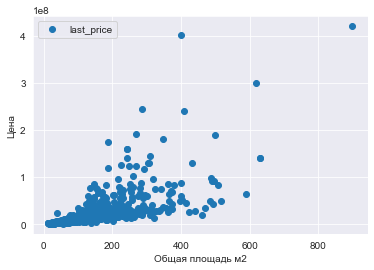

In [64]:
# создаём сводную таблицу в которой считаем необходимые значения
df_pivot_ttl_area = df.pivot_table(index=['total_area'], values='last_price',  aggfunc=['mean', 'count', 'median'])

# выводим грфик зависимотсти цены - общей площади
df_pivot_ttl_area.plot(y='median', style='o')
plt.xlabel('Общая площадь м2')
plt.ylabel('Цена')
plt.show


In [65]:
# находим коэфф. корреляции
df['total_area'].corr(df['last_price'])

0.6537455324606309

- Вывод

Мы видим, что цена зависит от общей площади только до определённого этапа. Начиная с площади 100 м<sup>2</sup> зависимость сильно уменьшается и разброс цен становится ярко выраженным.

##### Исследуем зависимость цены от жилой площади

<function matplotlib.pyplot.show(close=None, block=None)>

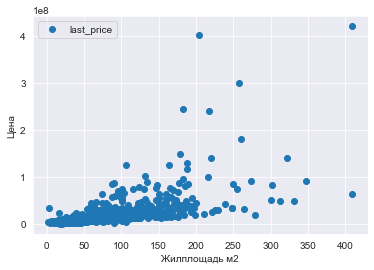

In [66]:
df_pivot_liv_area = df.pivot_table(index=['living_area'], values='last_price',  aggfunc=['mean', 'count', 'median'])
df_pivot_liv_area.plot(y='median', style='o')
plt.xlabel('Жилплощадь м2')
plt.ylabel('Цена')
plt.show

In [67]:
# находим коэфф корреляции
df['living_area'].corr(df['last_price'])

0.5716728775845996

- Вывод

Отношение жилплощади к цене похоже на отношение общей площади к цене на предыдущем графике но с несколько меньшей тенденцией с корреляции. До 200 м<sup>2</sup> взаимосвязь с ценой относительно сильная.

##### Исследуем зависимость цены от площади кухни

<function matplotlib.pyplot.show(close=None, block=None)>

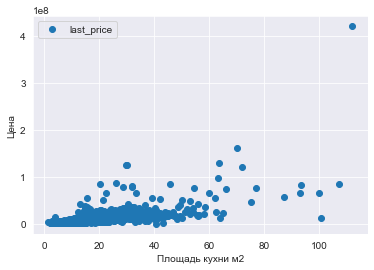

In [68]:
df_pivot_kitch_area = df.pivot_table(index=['kitchen_area'], values='last_price',  aggfunc=['mean', 'count', 'median'])
df_pivot_kitch_area.plot(y='median', style='o')
plt.xlabel('Площадь кухни м2')
plt.ylabel('Цена')
plt.show

In [69]:
# находим коэфф корреляции
df['kitchen_area'].corr(df['last_price'])

0.48827610686236905

- Вывод

Определённо, есть зависимость между площадью кухни и ценой квартиры, особенно хорошо это заметно вплоть до площади 60 м<sup>2</sup>. Но корреляция кухонной площади к цене ещё меньше чем общая площадь к цене и жиплощадь к цене. Такое расхождение возможно из-за выбивающихся значений.

##### Исследуем зависимость цены от количества комнат

<function matplotlib.pyplot.show(close=None, block=None)>

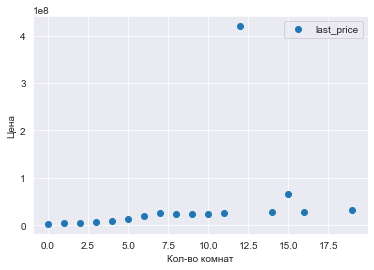

In [70]:
df_pivot_room_area = df.pivot_table(index=['rooms'], values='last_price',  aggfunc=['mean', 'count', 'median'])
df_pivot_room_area.plot(y='median', style='o')
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена')
plt.show

In [71]:
# находим коэфф корреляции
df['rooms'].corr(df['last_price'])

0.3636091239005261

- Вывод

Несмотря на низкий коэфф. коррляции из-за выбивающегося значения, в целом зависимость между ценой и количеством комнат вполне сильна.

##### Исследуем зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

<function matplotlib.pyplot.show(close=None, block=None)>

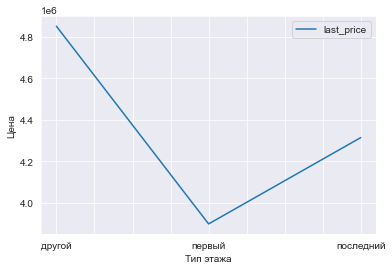

In [72]:
df_pivot_floor_cat = df.pivot_table(index=['floor_cat'], values='last_price',  aggfunc=['mean', 'count', 'median'])
df_pivot_floor_cat.plot(y='median', style='-')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show

- Вывод

Цены на первые этажи обычно ниже чем на последние и заметно ниже чем на другие этажи.

##### Исследуем зависимость цены от даты размещения (день недели)

<function matplotlib.pyplot.show(close=None, block=None)>

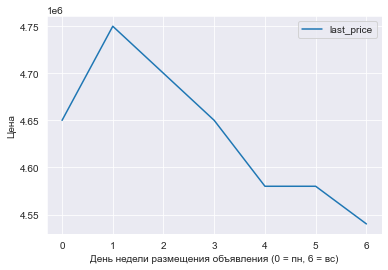

In [73]:
df_pivot_exp_wk = df.pivot_table(index=['exposition_wk'], values='last_price',  aggfunc=['mean', 'count', 'median'])
df_pivot_exp_wk.plot(y='median', style='-')
plt.xlabel('День недели размещения объявления (0 = пн, 6 = вс)')
plt.ylabel('Цена')
plt.show

- Вывод

График показывает что квартиры проданные во вторник имеют большую цену чем в остальные дни недели, начиная со среды, цены падают достигая минимума в воскресенье, и растут в понедельник.

##### Исследуем зависимость цены от даты размещения (месяц)

<function matplotlib.pyplot.show(close=None, block=None)>

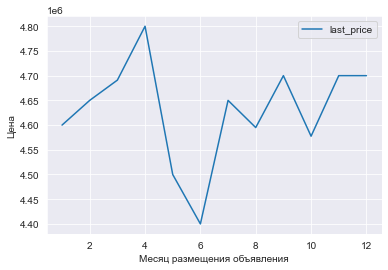

In [74]:
df_pivot_exp_m = df.pivot_table(index=['exposition_month'], values='last_price',  aggfunc=['mean', 'count', 'median'])
df_pivot_exp_m.plot(y='median', style='-')
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Цена')
plt.show

- Вывод

Самые низкие цены на те объекты которые были размещены летом, пик призодится на июнь. Наибольшие цены приходятся на объявления размещённые весной с пиком в апреле.

##### Исследуем зависимость цены от даты размещения (год)

<function matplotlib.pyplot.show(close=None, block=None)>

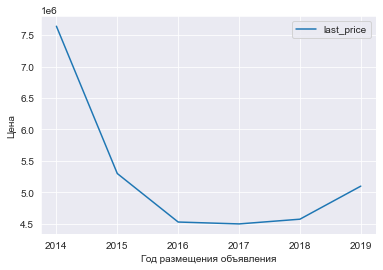

In [75]:
df_pivot_exp_y = df.pivot_table(index=['exposition_year'] , values='last_price',  aggfunc=['mean', 'count', 'median'])
df_pivot_exp_y.plot(y='median', style='-')
plt.xlabel('Год размещения объявления')
plt.ylabel('Цена')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

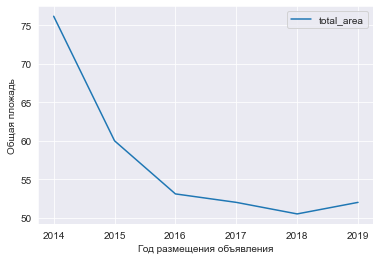

In [76]:
df_pivot_exp_y = df.pivot_table(index=['exposition_year'] , values='total_area',  aggfunc=['mean', 'count', 'median'])
df_pivot_exp_y.plot(y='median', style='-')
plt.xlabel('Год размещения объявления')
plt.ylabel('Общая пложадь')
plt.show

- Вывод

Мы видим явную тенденцию к резкому снижению цены на недвижимость с 2014 вполть до 2016 гг где цена выходит на плато до 2018 г после чего начинать вновсь расти хоть и меньшим темпом чем было падение.

Однако, если привести доп график с динамикой общей площади по годам, то мы увидим, что снижение цены связано с падением общей площадью на рынке недвижимости.

#### Находим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и населённые пункты с самой высокой и низкой стоимостью квадратного метра

Средняя цена кв. метра в 10 населённых пунктах с наибольшим числом объявлений

In [77]:
df_pivot_loc_sq_m = df.pivot_table(index=['locality_name'] , values='sqare_m_price',  aggfunc=['median', 'count'])
df_pivot_loc_sq_m.columns = ['count', 'median']

df_pivot_loc_sq_m = df_pivot_loc_sq_m.sort_values('count', ascending = False).head(10)
display(df_pivot_loc_sq_m)


,count,median
locality_name,,
Санкт-Петербург,104774.535809,15645
Зеленогорск,101666.666667,24
Кудрово,100000.000000,171
Пушкин,100000.000000,369
Сестрорецк,99678.456592,183
поселок Левашово,96997.690531,1
деревня Кудрово,91860.465116,299
поселок Парголово,91642.857143,327
деревня Мистолово,90888.888889,11


Находим населённые пункты с минимальной и максимальной стоимостью квадратного метра

In [78]:
print('Город с максимальной стоимостью квадратного метра:')
#display( df_pivot_loc_sq_m.loc[df_pivot_loc_sq_m['mean'] == df_pivot_loc_sq_m['mean'].max()])
display( df_pivot_loc_sq_m.loc[df_pivot_loc_sq_m['median'] == df_pivot_loc_sq_m['median'].max()])
print('Город с минимальной стоимостью квадратного метра:')
#display(df_pivot_loc_sq_m.loc[df_pivot_loc_sq_m['mean'] == df_pivot_loc_sq_m['mean'].min()])
display(df_pivot_loc_sq_m.loc[df_pivot_loc_sq_m['median'] == df_pivot_loc_sq_m['median'].min()])

Город с максимальной стоимостью квадратного метра:


,count,median
locality_name,,
Санкт-Петербург,104774.535809,15645


Город с минимальной стоимостью квадратного метра:


,count,median
locality_name,,
поселок Левашово,96997.690531,1


- Вывод

Очень наглядное сравнение показывает разницу в цене квадратного метра в зависимотсти от населённого пункта. Самый дорогой квадратный метр жилья  из выборки находится в Санкт-Петербурге (15645 / м), а самый недорогой в поселке Левашово (1 / м).

#### Вычисляем среднюю цену квадратного метра жилья и её динамику при удалении от центра Санкт-Петербурга на каждый километр расстояния.

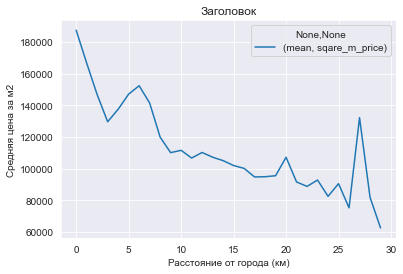

,mean
,sqare_m_price
cityCenters_nearest_km,
0,187324.130319
1,166603.755531
2,146662.860056
3,129526.934854
4,137413.428334
5,146978.313310
6,152277.893519
7,141399.731456


In [79]:
# делаем срез по Санкт-Петербургу и создаём сводную таблицу, где считаем среднюю цену жилья в зависимости от удаления от центра города

df_pivot_loc_cc_km = df.loc[df['locality_name'] == 'Санкт-Петербург']\
    .pivot_table(
        index=['cityCenters_nearest_km'] , values='sqare_m_price',  aggfunc=['mean'])

# создаём таблицу со средней стоимостью квадратного метра в зввисимости от удаления о центра

df_pivot_loc_cc_km.plot(title = 'Заголовок')
plt.xlabel('Расстояние от города (км)')
plt.ylabel('Средняя цена за м2')
plt.show()
display(df_pivot_loc_cc_km)

- Вывод

- На расстоянии 8 км от ценра города наблюдается резкий, переходящий в более пологий и продолжительный спад цен на квадратный метр жилья, что примерно совпадает с границами города. 
- Третий по счёту пик стоимости приходящийся на 27 км возможно связан с повышеной стоимостью жилья в городах-спутниках находящихся на расстоянии ~27 км от центра Санкт-Петербурга. 
- Такие города как Красное Село и Пушкин находятся в радиусе 27 км и могут влиять на локальный всплеск стоимости квадратного метра жилья.

### Общий вывод

В ходе проведённого исследования ценообразования недвижимости Санкт-Петербурга и Ленинградской области, была проделана работа по выявлянию зависимости цены недвижимости от нижеследующих параметров:

- общая площадь
- жилая площадь
- площадь кухни
- кол-во комнат
- этажность
- дата публикации объявления
- населённый пункт
- расстояние от центра Санкт-Петербурга

В результате проведённого анализа, был выявлен ряд закономерностей, которые в разной мере, оказывают влияние на стоимость жилья.

Ход работы:

Перед тем как работать над данными, была проведена скурпулёзная работа по предобработке сырой информации которая включала в себя выявление, удаление или заполнение пропущенных значений характерными показателями, нахождение и отсечение аномальных значений.

По всем вышеперечисленным значениям были высчитаны новые, промежуточные значения, составлены подробные графики и гистограммы которые позволили визуализировать информацию и подготовить почву для составления выводов исследвания.

Приведём их ниже:

- Цена недвижимости положительно зависит от площади жилья площадью не более 100 м<sup>2</sup>, при большем метраже зависимость уменьшается.

- Похожая картина с жилплощадью, до 200 м<sup>2</sup> положительная зависимость есть.

- Определённо, есть положительная зависимость между площадью кухни и ценой квартиры, особенно хорошо это заметно вплоть по площади 60 м<sup>2</sup>.

- Есть чёткая положительная зависимость между количеством комнат и ценой.

- Цены на квартиры в промежуточных этажах в среднем выше чем на первом и последнем

- Дороже всего квартиры размещённые по вторникам летом в июне 2014 года

- Самый дорогой м<sup>2</sup> жилья находиться в городе Санкт-Петербург. Чем ближе к центру - тем дороже.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод